1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

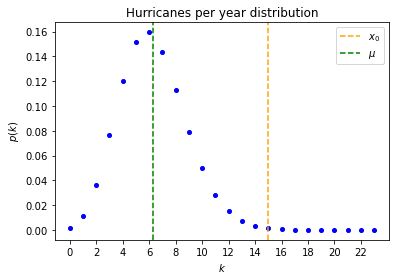

In [2]:
x0 = 15
mu = 6.3

# plot hurricanes pmf
k = np.arange(stop=24)
y = stats.poisson.pmf(k, mu)
plt.plot(k, y, 'bo', ms=4)
plt.axvline(x0, ls='--', c='orange', label='$x_0$')
plt.axvline(mu, ls='--', c='green', label='$\mu$')
plt.ylabel("$p(k)$")
plt.xlabel("$k$")
plt.title('Hurricanes per year distribution')
plt.xticks(range(0, len(k), 2))
plt.legend()
plt.show()

In [3]:
prob = 1. - np.sum(stats.poisson.pmf(np.arange(stop=15), mu))
print(f'Probability of 15 or more hurricanes in a year = {prob*100:.4f} %\n')

Z_score = abs(x0 - mu) / np.sqrt(mu) # Poisson dist.: sigma == sqrt(mu)
print(f'Z = {Z_score:.2f}')

# consider statistically significant a probability that has a Z score of 3 or larger
thres  = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z_score) + (1. - stats.norm.cdf(Z_score))

print(f'p-value = {pvalue:.4f}')

print(f'Is {x0} statistically significant?', 'Yes' if pvalue >= thres else 'No')

Probability of 15 or more hurricanes in a year = 0.2217 %

Z = 3.47
p-value = 0.0005
Is 15 statistically significant? No


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Set the significance level to alpha = .05
T = -3.79


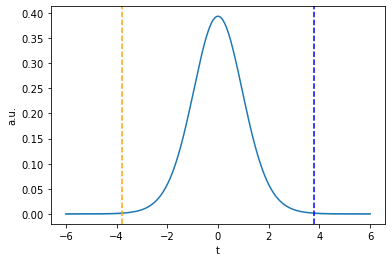

p-value = 0.0013
pvalue < alpha/2 -> we accept the null hypothesis (no significant difference between the 2 populations)
We conclude that the change in average blood pressure is not statistically significant


In [4]:
pre  = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)
dof = 2*n - 2 # degrees of freedom

print('Set the significance level to alpha = .05')

sigma = np.sqrt(.5 * (np.var(pre, ddof=1) + np.var(post, ddof=1)))

T = (np.mean(pre) - np.mean(post)) / sigma / np.sqrt(2/n)
print(f'T = {T:.2f}')

# plot the test statistics pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.t.pdf(xs, dof)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, ls='--', c='orange')
plt.axvline(-T, ls='--', c='blue')
plt.ylabel('a.u.')
plt.xlabel('t')
plt.show()

pvalue = stats.t.cdf(T, dof) + (1. - stats.t.cdf(-T, dof))
print(f'p-value = {pvalue:.4f}')
print('pvalue < alpha/2 -> we accept the null hypothesis (no significant difference between the 2 populations)')
print('We conclude that the change in average blood pressure is not statistically significant')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

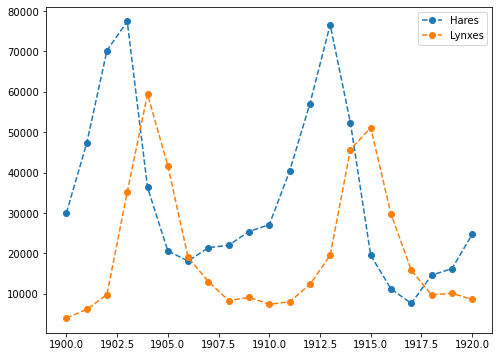

In [5]:
from scipy import fftpack

year, hares, lynxes, _ = np.loadtxt('data/populations.txt').T

plt.figure(figsize=(8, 6))
plt.plot(year, hares, marker='o', linestyle='--', label='Hares')
plt.plot(year, lynxes, marker='o', linestyle='--', label='Lynxes')
plt.legend()

period hares  =  10.5
period lynxes =  10.5


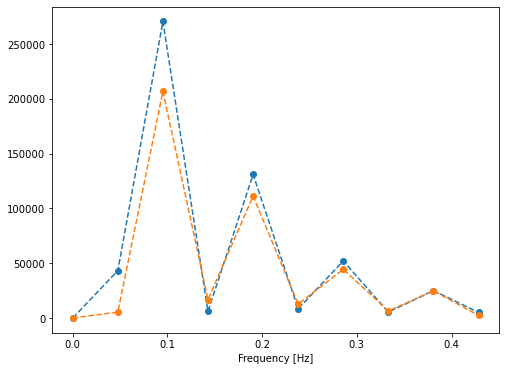

In [6]:
# number of samples
N = year.size

# remove dc component
hares  -= np.mean(hares)
lynxes -= np.mean(lynxes)

# compute the (amplitude of the) fft
hares_f  = np.abs(fftpack.fft(hares)[:N//2]) # intrested only on the positive freq.
lynxes_f = np.abs(fftpack.fft(lynxes)[:N//2])

freqs = fftpack.fftfreq(N, d=1.)[:N//2]

plt.figure(figsize=(8, 6))
plt.plot(freqs, hares_f, marker='o', linestyle='--')
plt.plot(freqs, lynxes_f, marker='o', linestyle='--')
plt.xlabel('Frequency [Hz]')

hares_T  = 1. / freqs[np.argmax(hares_f)]
lynxes_T = 1. / freqs[np.argmax(lynxes_f)]
print('period hares  = ', hares_T)
print('period lynxes = ', lynxes_T)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

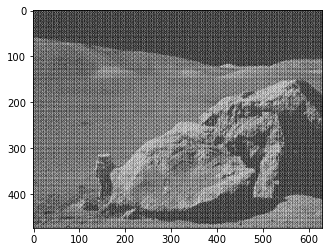

In [7]:
image = plt.imread('moonlanding.png')
plt.figure()
plt.imshow(image, cmap='gray')

Text(0.5, 1.0, 'Fourier transform')

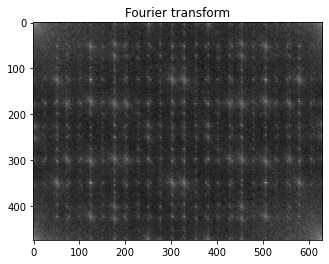

In [8]:
from matplotlib.colors import LogNorm

#image = np.pad(image, pad_width=((0,image.shape[0]),(0,image.shape[1])))
image_fft = fftpack.fft2(image)

plt.figure()
plt.imshow(np.abs(image_fft), cmap='gray', norm=LogNorm(vmin=5))
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

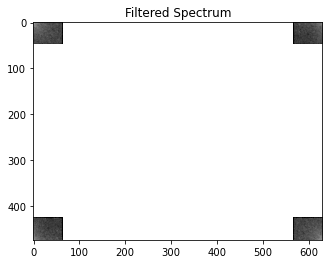

In [9]:
# perform low pass filtering (i.e., keep low frequencies)
frac = 0.1
rows, cols = image_fft.shape
image_fft[int(rows*frac):int(rows*(1-frac))] = 0
image_fft[:, int(cols*frac):int(cols*(1-frac))] = 0

plt.figure()
plt.imshow(np.abs(image_fft), cmap='gray', norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Filtered Image')

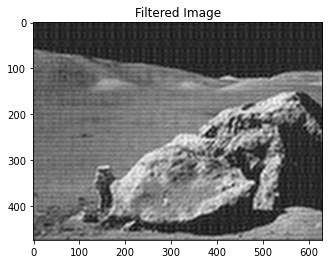

In [10]:
filtered = fftpack.ifft2(image_fft).real

plt.figure()
plt.imshow(filtered, cmap='gray')
plt.title('Filtered Image')